Main things I did in this notebook:

+  Aggregated daily sales data to weekly sales data.
+  Tested stationarity for weekly sales data. 
+  Checked acf and pacf plots for weekly sales data.
+  Split weekly sales data to train and test.
+  Tested average, naive methods.
+  Tested AR, SARIMA model with and without cross validation. 
+  Tested AR, SARIMA model with exogenous variable: the week number (week index in each year).
+  Observed the result and so far the conclusion is SARIMA model with exog variable performs the best. (Has the highest R2 score and lowest MAE)

In [883]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [884]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/Data') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Data
/Users/liuyang/Desktop/Springboard_Capstone3/Data


In [885]:
df = pd.read_csv('train.csv')

In [886]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [887]:
df.shape

(1017209, 9)

No missing value detected

In [888]:
# creata a function to calculate unique value count and percentage for the whole dataset
# and check the data type for each column
def data_info(data):
    count = data.nunique()
    va_pct = round(count/(data.shape[0])*100,4)
    nan_p = round(data.isnull().sum()/data.shape[0]*100,4)
    frame = pd.DataFrame(zip(count,va_pct,nan_p), index=count.index, 
                         columns=['counts','unique_value_pct', 'nan_pct']).reset_index().rename(columns={'index': 'column'})
    
  
    frame['data_type']= df.dtypes.tolist()
    return frame.sort_values('counts', ascending=False)

In [889]:
data_info(df)

,column,counts,unique_value_pct,nan_pct,data_type
3,Sales,21734,2.1366,0.0,int64
4,Customers,4086,0.4017,0.0,int64
0,Store,1115,0.1096,0.0,int64
2,Date,942,0.0926,0.0,object
1,DayOfWeek,7,0.0007,0.0,int64
7,StateHoliday,5,0.0005,0.0,object
5,Open,2,0.0002,0.0,int64
6,Promo,2,0.0002,0.0,int64
8,SchoolHoliday,2,0.0002,0.0,int64


In [890]:
# correct data type for column 'Date'
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [891]:
data_info(df)

,column,counts,unique_value_pct,nan_pct,data_type
3,Sales,21734,2.1366,0.0,int64
4,Customers,4086,0.4017,0.0,int64
0,Store,1115,0.1096,0.0,int64
2,Date,942,0.0926,0.0,datetime64[ns]
1,DayOfWeek,7,0.0007,0.0,int64
7,StateHoliday,5,0.0005,0.0,object
5,Open,2,0.0002,0.0,int64
6,Promo,2,0.0002,0.0,int64
8,SchoolHoliday,2,0.0002,0.0,int64


In [892]:
df = df.sort_values(['Date', 'Store'], ascending=True)

In [893]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1016096,2,2,2013-01-01,0,0,0,0,a,1
1016097,3,2,2013-01-01,0,0,0,0,a,1
1016098,4,2,2013-01-01,0,0,0,0,a,1
1016099,5,2,2013-01-01,0,0,0,0,a,1


In [894]:
# Check the number of stores

print('The number of stores is: {}'.format(len(set(df.Store))))

The number of stores is: 1115


In [1031]:
#storedailydata=df.loc[df.Store==139]
storedailydata=df.loc[df.Store==972]
storeweeklysales = storedailydata.set_index('Date').resample('w').Sales.sum()

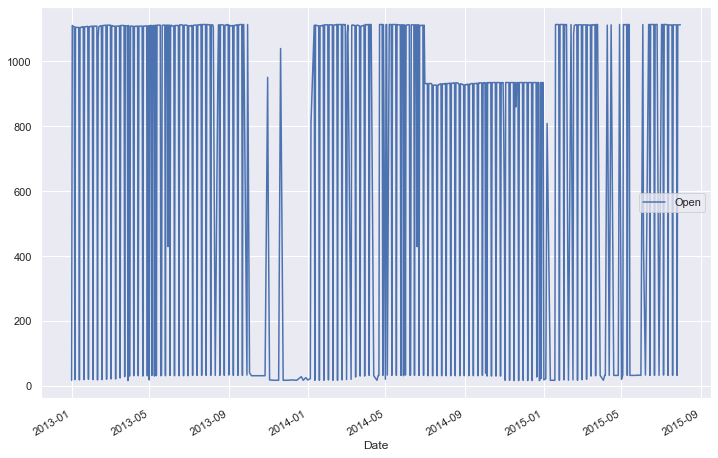

In [952]:
pd.pivot_table(df[['Date', 'Open']], index='Date', aggfunc='sum').loc[pd.pivot_table(df[['Date', 'Open']], index='Date', aggfunc='sum').Open<1115].plot()

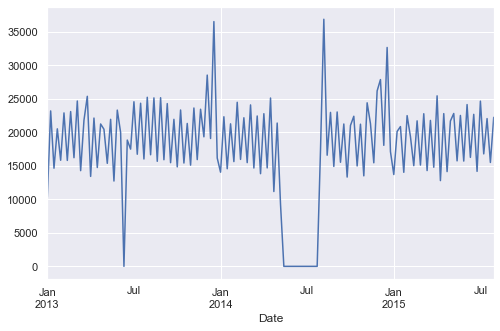

In [1032]:
storeweeklysales.plot()
plt.show()

In [974]:
#sorted(Store972[Store972.Sales==0].Date)

In [1019]:
storeweeklysales = storeweeklysales[storeweeklysales!=0]

In [993]:
storeweeklysales.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2015-05-31', '2015-06-07', '2015-06-14', '2015-06-21',
               '2015-06-28', '2015-07-05', '2015-07-12', '2015-07-19',
               '2015-07-26', '2015-08-02'],
              dtype='datetime64[ns]', name='Date', length=110, freq=None)

In [992]:
storeweeklysales.values

array([19446, 45008, 28699, 39532, 31613, 41666, 27659, 41224, 30831,
       44494, 31399, 40400, 39889, 25219, 40847, 31030, 41149, 36744,
       31296, 42864, 27751, 33256, 41188, 32629, 41099, 33032, 39819,
       32224, 45229, 31765, 45708, 32112, 37838, 29312, 37337, 28208,
       41698, 30086, 40761, 30423, 42237, 32663, 40479, 28229, 45236,
       32807, 44367, 36639, 49799, 39521, 63596, 26900, 30278, 42290,
       29864, 41929, 30914, 43005, 30386, 39681, 33861, 37994, 32502,
       40534, 33529, 46226, 33568, 40577, 26561, 37839, 44851, 33418,
       39801, 32621, 48328, 28722, 35775, 31966, 12179,  9685, 39076,
       42170, 32914, 41069, 40312, 34565, 38041, 35124, 42148, 34178,
       43249, 36630, 43163, 28513, 45454, 33000, 39897, 43515, 33033,
       45670, 29162, 38840, 34424, 42571, 34580, 46117, 31510, 40572,
       34719, 42644])

In [947]:
#sorted(df[df.Sales==0].Date.value_counts().index)

In [896]:
storeweeklysales.head()

Date
2013-01-06    19446
2013-01-13    45008
2013-01-20    28699
2013-01-27    39532
2013-02-03    31613
Freq: W-SUN, Name: Sales, dtype: int64

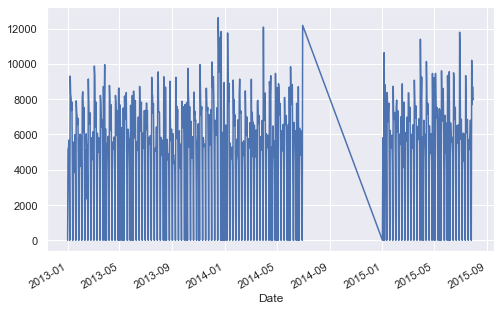

In [981]:
plt.rcParams['figure.figsize'] = (8, 5)
storedailydata.set_index('Date').Sales.plot()
dailytotalsales = storedailydata.set_index('Date').Sales

In [898]:
# aggregate total daily sales from all the stores.
# dailytotalsales = pd.pivot_table(df[['Date', 'Sales']], index='Date', aggfunc='sum')

In [899]:
# dailytotalsales.head()

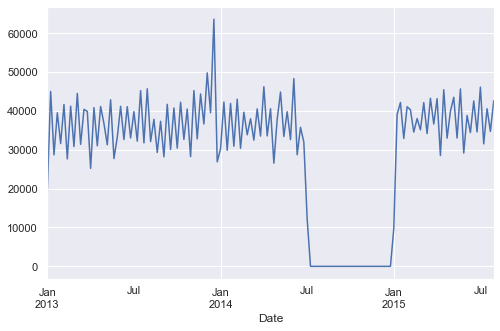

In [900]:
storeweeklysales.plot()

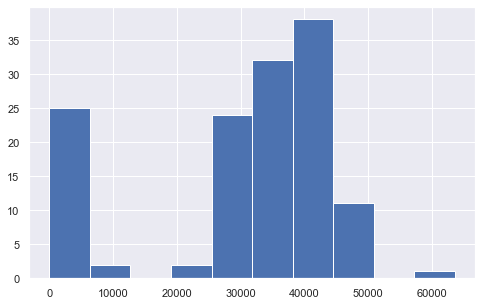

In [901]:
storeweeklysales.hist()

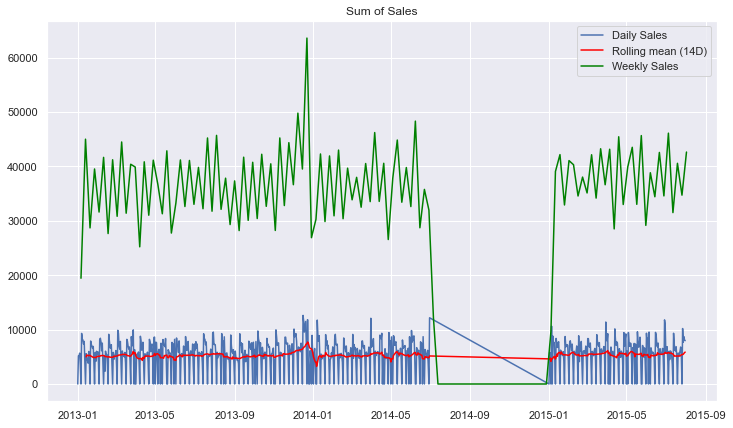

In [1039]:
plt.figure(figsize=(12,7))
plt.plot(dailytotalsales)
plt.plot(dailytotalsales.index, dailytotalsales.rolling(14).mean(), 'red')
plt.plot(dailytotalsales.resample('w').sum(), 'green')

plt.legend(['Daily Sales', 'Rolling mean (14D)', 'Weekly Sales'])
plt.title('Sum of Sales')
plt.show()

In [1055]:
train_startdate = storeweeklysales.loc[storeweeklysales[(storeweeklysales == 0)].index[-1]:].index[1]

Timestamp('2014-08-03 00:00:00', freq='W-SUN')

In [904]:
# storeweeklysales = storeweeklysales[(storeweeklysales != 0)]
# storeweeklysales.plot()

We can see there's a big decline in sales around July 2014 ~ Dec 2014

In [905]:
# plt.rcParams['figure.figsize'] = (8, 5)
# pd.pivot_table(df[['Date', 'Store']], index='Date', aggfunc='count').plot()
# plt.show()

By checking the number of stores from 07/2-14 to 12/2014, we noticed that there were 180 stores missing from the dataset. We assume those stores were not open during this period, which caused the big drop in sales. 

In [906]:
storecount2014 = set(df[df.Date=='2014-07-01'].Store)
storecount2013 = set(df[df.Date=='2013-07-01'].Store)


print('Number of closed stores: {}'.format(len(storecount2013.difference(storecount2014))))

Number of closed stores: 180


In [907]:
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [908]:
# check stationarity 

sta_result = adfuller(storeweeklysales)
print('ADF Statistic: %f' % sta_result[0])
print('p-value: %f' % sta_result[1])
print('Critical Values:')
for key, value in sta_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.658346
p-value: 0.452691
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578


as p-value is smaller than 0.05, we can reject null hypothesis and say the weekly sales data is stationary.

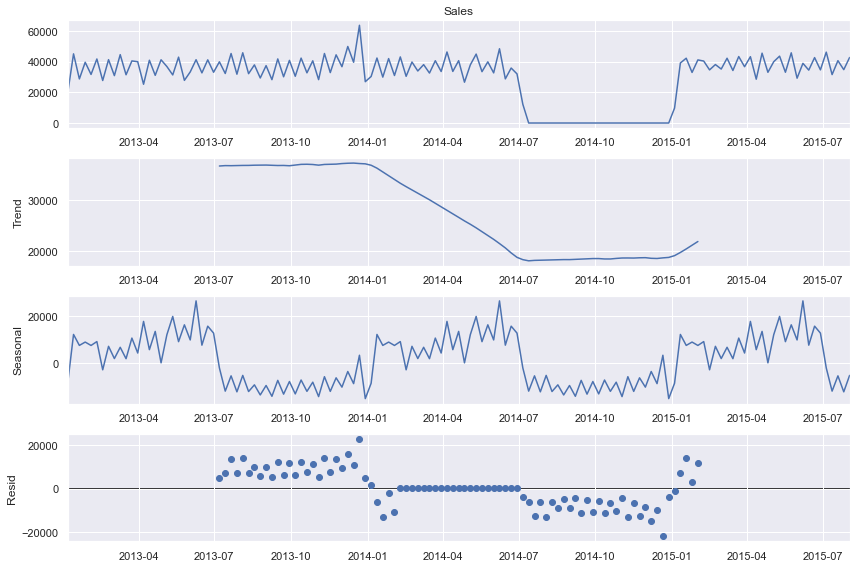

In [909]:
# decompose trend, seasonality
plt.rcParams['figure.figsize'] = (12, 8)
decomp = seasonal_decompose(storeweeklysales, model='additive')
decomp.plot()
plt.show()

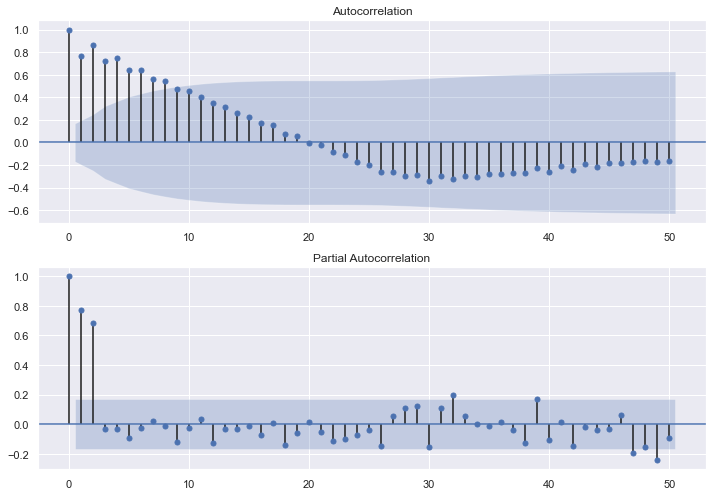

In [910]:
# check acf and pacf plot

fig, ax = plt.subplots(2,1,figsize=(10,7))
plot_acf(storeweeklysales, lags=50, ax=ax[0])
# ax[0].axvline(12, color='red', ls='--', alpha=0.8, lw=0.7, label='lag = 12')
# ax[0].axvline(24, color='orange', ls='--', alpha=1, lw=0.8, label='lag = 24')
#ax[0].legend()
plot_pacf(storeweeklysales, lags=50, ax=ax[1])
plt.tight_layout()

pacf has sharp cut off after lag2,  very likely to be a AR(2) model.
<br>Therefore we will try p=1 or p=2.

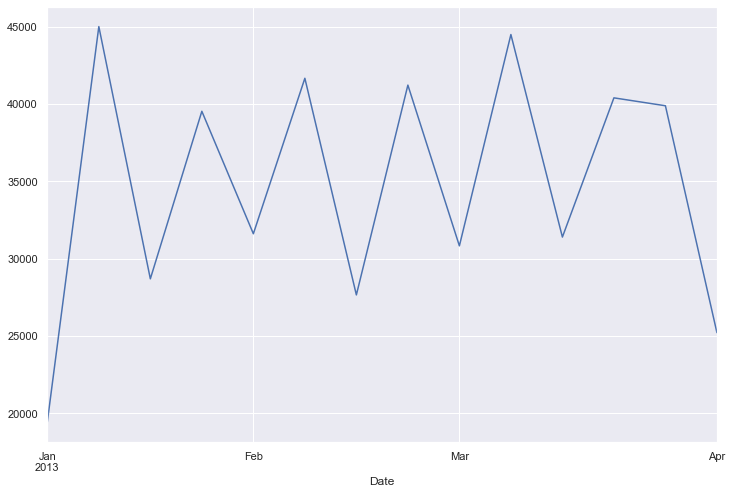

In [911]:
storeweeklysales[0:14].plot()
plt.show()

Can observe a seasonality of 2weeks from this plot above.

In [912]:
storeweeklysales.loc['2014-08-03':].shape

(53,)

In [913]:
from sklearn.model_selection import TimeSeriesSplit

<b>By checking the date of test dataset on Kaggle, we can tell that we need to predict sales from 2015-08-01 ~ 2015-09-16 (week 08/09 ~ week 09/20), containing sales of 7 weeks. Therefore we will split the train and test set as below, our test set contains sales data of 7 weeks: week 06/21 ~ week 08/02.

In [1033]:
train = storeweeklysales.loc['2014-08-03':][:46]
test = storeweeklysales.loc['2014-08-03':][46:-1]

# train = storeweeklysales[:-7]
# test = storeweeklysales[-7:-1]

In [1007]:
train

Date
2013-01-06    19446
2013-01-13    45008
2013-01-20    28699
2013-01-27    39532
2013-02-03    31613
              ...  
2015-05-17    33033
2015-05-24    45670
2015-05-31    29162
2015-06-07    38840
2015-06-14    34424
Name: Sales, Length: 103, dtype: int64

In [1006]:
test

Date
2015-06-21    42571
2015-06-28    34580
2015-07-05    46117
2015-07-12    31510
2015-07-19    40572
2015-07-26    34719
Name: Sales, dtype: int64

In [995]:
print('shape of train set:{}'.format(train.shape))
print('shape of test set:{}'.format(test.shape))

shape of train set:(104,)
shape of test set:(6,)


In [916]:
train.index

DatetimeIndex(['2014-08-03', '2014-08-10', '2014-08-17', '2014-08-24',
               '2014-08-31', '2014-09-07', '2014-09-14', '2014-09-21',
               '2014-09-28', '2014-10-05', '2014-10-12', '2014-10-19',
               '2014-10-26', '2014-11-02', '2014-11-09', '2014-11-16',
               '2014-11-23', '2014-11-30', '2014-12-07', '2014-12-14',
               '2014-12-21', '2014-12-28', '2015-01-04', '2015-01-11',
               '2015-01-18', '2015-01-25', '2015-02-01', '2015-02-08',
               '2015-02-15', '2015-02-22', '2015-03-01', '2015-03-08',
               '2015-03-15', '2015-03-22', '2015-03-29', '2015-04-05',
               '2015-04-12', '2015-04-19', '2015-04-26', '2015-05-03',
               '2015-05-10', '2015-05-17', '2015-05-24', '2015-05-31',
               '2015-06-07', '2015-06-14'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

In [917]:
test.index

DatetimeIndex(['2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
               '2015-07-19', '2015-07-26'],
              dtype='datetime64[ns]', name='Date', freq='W-SUN')

## Try average method

In [918]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

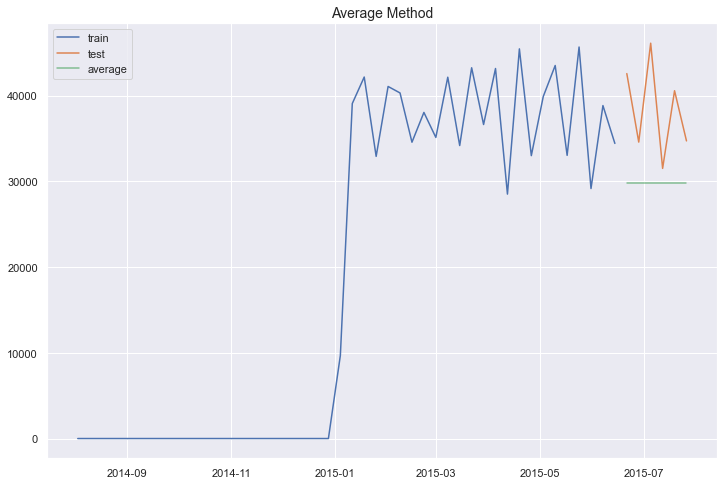

MAE for average method:8561.9


In [919]:
average = np.full((6,),storeweeklysales.mean())
true_values = test.values
mae = mean_absolute_error(true_values, average)

plt.plot(train,label='train')
# predict last 6 month (27 weeks)
plt.plot(test, label='test')
plt.plot(test.index, average, alpha=0.7, label='average')

plt.title('Average Method', fontsize=14)
plt.legend()
plt.show()

print('MAE for average method:{0:.1f}'.format(mae))

## Try Naive method

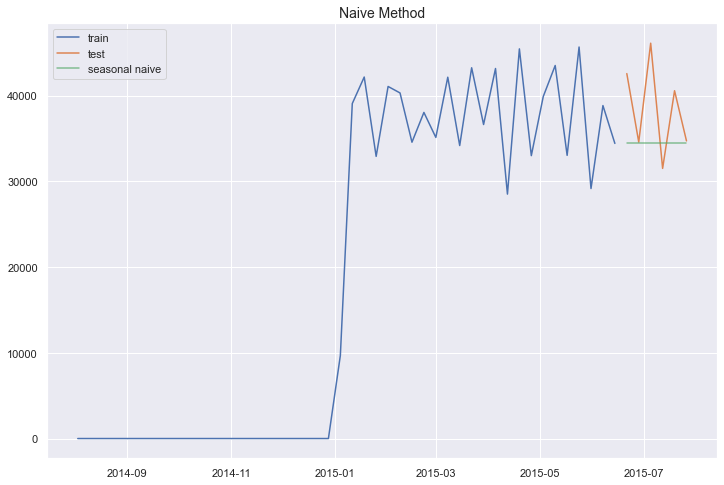

MAE for naive method: 4892.2


In [920]:
naive = np.full((6,),train[-1])
mae = mean_absolute_error(true_values, naive)

plt.plot(train,label='train')
# predict last 6 month (27 weeks)
plt.plot(test, label='test')
plt.plot(test.index, naive,alpha=0.7, label='seasonal naive')

plt.legend()
plt.title('Naive Method', fontsize=14)
plt.show()
print('MAE for naive method: {0:.1f}'.format(mae))

In [921]:
from pmdarima.arima import auto_arima

In [1034]:
arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=2, seasonal=True, 
                          error_action='warn',trace = False,
                          supress_warnings=True,stepwise = False,
                          random=True,
                          random_state=20, n_fits=50)
                     

In [1035]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                   46
Model:             SARIMAX(0, 1, [1], 2)   Log Likelihood                -436.376
Date:                   Wed, 13 Jan 2021   AIC                            878.753
Time:                           16:47:16   BIC                            884.105
Sample:                                0   HQIC                           880.738
                                    - 46                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    227.8710    443.055      0.514      0.607    -640.500    1096.242
ma.S.L2       -0.4907      0.121     -4.049      0.000      -0.728      -0.253
sigma2      2.583e+07      0.001   3.99e+10      0.000    2.58e+07    2.58e+07
===================================================================================
Ljung-Box (Q):                       33.78   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.75   Prob(JB):                         0.63
Heteroskedasticity (H):               0.71   Skew:                            -0.28
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+27. Standard errors may be unstable.
"""

In [1036]:

predictions = pd.DataFrame(arima_model.predict(n_periods=6), index=test.index)
#predictions_ci = arima_model.get_forecast(steps=7).conf_int()
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)

#print(sarima.summary().tables[1])
print('R2 for SARIMA model: {0:.3f}'.format(R2))
print('MAE for SARIMA model: {0:.1f}'.format(mae))

R2 for SARIMA model: 0.803
MAE for SARIMA model: 1484.1


In [925]:
predictions

,0
Date,
2015-06-21,36886.201983
2015-06-28,36924.482152
2015-07-05,37306.207756
2015-07-12,38370.409456
2015-07-19,38303.775370
2015-07-26,39571.458166


In [926]:
test

Date
2015-06-21    42571
2015-06-28    34580
2015-07-05    46117
2015-07-12    31510
2015-07-19    40572
2015-07-26    34719
Freq: W-SUN, Name: Sales, dtype: int64

In [927]:
forecastindex = pd.date_range('2015-07-27', '2015-09-20', freq='W')
forecastindex

DatetimeIndex(['2015-08-02', '2015-08-09', '2015-08-16', '2015-08-23',
               '2015-08-30', '2015-09-06', '2015-09-13', '2015-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [1037]:
arima_model = auto_arima(storeweeklysales.loc['2014-08-03':'2015-07-26'],start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=2, seasonal=True, 
                          error_action='warn',trace = False,
                          supress_warnings=True,stepwise = False,
                          random=True,
                          random_state=20, n_fits=50)

Forecast = pd.DataFrame(arima_model.predict(n_periods=8), index=forecastindex)

# arima_model = auto_arima(storeweeklysales,start_p=0, d=0, start_q=0, 
#                           max_p=5, max_d=5, max_q=5, start_P=0, 
#                           D=1, start_Q=0, max_P=5, max_D=5,
#                           max_Q=5, m=2, seasonal=True, 
#                           error_action='warn',trace = False,
#                           supress_warnings=True,stepwise = False,
#                           random=True,
#                           random_state=20, n_fits=50)

# Forecast = pd.DataFrame(arima_model.predict(n_periods=8), index=forecastindex)

In [1025]:
storeweeklysales.shape

(123,)

In [929]:
storeweeklysales.loc['2014-08-03':'2015-07-26']

Date
2014-08-03        0
2014-08-10        0
2014-08-17        0
2014-08-24        0
2014-08-31        0
2014-09-07        0
2014-09-14        0
2014-09-21        0
2014-09-28        0
2014-10-05        0
2014-10-12        0
2014-10-19        0
2014-10-26        0
2014-11-02        0
2014-11-09        0
2014-11-16        0
2014-11-23        0
2014-11-30        0
2014-12-07        0
2014-12-14        0
2014-12-21        0
2014-12-28        0
2015-01-04     9685
2015-01-11    39076
2015-01-18    42170
2015-01-25    32914
2015-02-01    41069
2015-02-08    40312
2015-02-15    34565
2015-02-22    38041
2015-03-01    35124
2015-03-08    42148
2015-03-15    34178
2015-03-22    43249
2015-03-29    36630
2015-04-05    43163
2015-04-12    28513
2015-04-19    45454
2015-04-26    33000
2015-05-03    39897
2015-05-10    43515
2015-05-17    33033
2015-05-24    45670
2015-05-31    29162
2015-06-07    38840
2015-06-14    34424
2015-06-21    42571
2015-06-28    34580
2015-07-05    46117
2015-07-12    3

In [1026]:
Forecast

,0
2015-08-02,17853.266336
2015-08-09,21588.753483
2015-08-16,18910.298691
2015-08-23,21317.259286
2015-08-30,19533.920915
2015-09-06,21190.234838
2015-09-13,19914.295051
2015-09-20,21145.103365


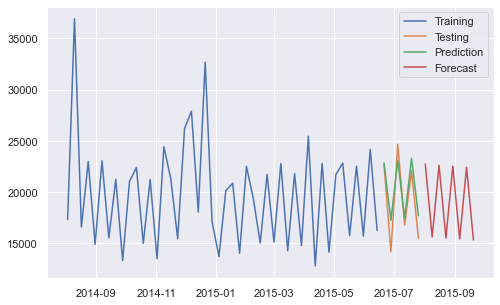

In [1038]:
#plt.figure(figsize=(8,5))

plt.plot(train,label="Training")
plt.plot(test,label="Testing")
#plt.plot(test,label="Test")
plt.plot(predictions, label="Prediction")
plt.plot(Forecast,label="Forecast")
plt.legend(loc = 'Left corner')
plt.show()

In [1027]:
train.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2015-04-12', '2015-04-19', '2015-04-26', '2015-05-03',
               '2015-05-10', '2015-05-17', '2015-05-24', '2015-05-31',
               '2015-06-07', '2015-06-14'],
              dtype='datetime64[ns]', name='Date', length=116, freq=None)

In [1028]:
test.index

DatetimeIndex(['2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
               '2015-07-19', '2015-07-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [1029]:
predictions.index

DatetimeIndex(['2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
               '2015-07-19', '2015-07-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [1030]:
Forecast.index

DatetimeIndex(['2015-08-02', '2015-08-09', '2015-08-16', '2015-08-23',
               '2015-08-30', '2015-09-06', '2015-09-13', '2015-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [1083]:
forecastindex = pd.date_range('2015-07-27', '2015-09-20', freq='W')
forecastindex

DatetimeIndex(['2015-08-02', '2015-08-09', '2015-08-16', '2015-08-23',
               '2015-08-30', '2015-09-06', '2015-09-13', '2015-09-20'],
              dtype='datetime64[ns]', freq='W-SUN')

In [1095]:
storeid=972
storedailydata=df.loc[df.Store==storeid]
storeweeklysales = storedailydata.set_index('Date').resample('w').Sales.sum()

In [1085]:
train_startdate = storeweeklysales.loc[storeweeklysales[(storeweeklysales == 0)].index[-1]:].index[1]
train_enddate = len(storeweeklysales.loc[train_startdate:])-7
train = storeweeklysales.loc[train_startdate:][:train_enddate]
test = storeweeklysales.loc[train_startdate:][train_enddate:-1]


In [1089]:
train_startdate

Timestamp('2014-08-03 00:00:00', freq='W-SUN')

In [1107]:
test.index[-1]

Timestamp('2015-07-26 00:00:00')

In [1087]:
arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=2, seasonal=True, 
                          error_action='warn',trace = False,
                          supress_warnings=True,stepwise = False,
                          random=True,
                          random_state=20, n_fits=50)

predictions = pd.DataFrame(arima_model.predict(n_periods=6), index=test.index)
#predictions_ci = arima_model.get_forecast(steps=7).conf_int()
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)

print('R2 for SARIMA model: {0:.3f}'.format(R2))
print('MAE for SARIMA model: {0:.1f}'.format(mae))                     

R2 for SARIMA model: 0.803
MAE for SARIMA model: 1484.1


In [1092]:

arima_model = auto_arima(storeweeklysales.loc[train_startdate:test.index[-1]],start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=2, seasonal=True, 
                          error_action='warn',trace = False,
                          supress_warnings=True,stepwise = False,
                          random=True,
                          random_state=20, n_fits=50)

Forecast = pd.DataFrame(arima_model.predict(n_periods=8), index=forecastindex)

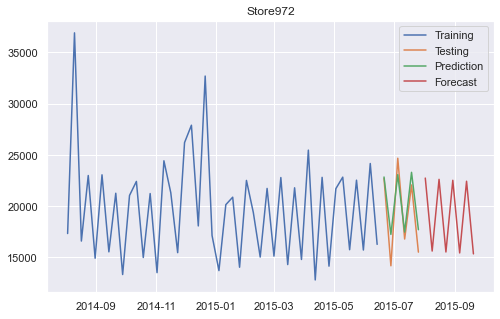

In [1096]:
plt.plot(train,label="Training")
plt.plot(test,label="Testing")
#plt.plot(test,label="Test")
plt.plot(predictions, label="Prediction")
plt.plot(Forecast,label="Forecast")
plt.title(f'Store {storeid}')
plt.legend(loc = 'Left corner')
plt.show()

In [1110]:
storedailydata=df.loc[df.Store==storeid]
storeweeklysales = storedailydata.set_index('Date').resample('w').Sales.sum()

In [1111]:
storeweeklysales = storeweeklysales[storeweeklysales!=0]

In [1112]:
train = storeweeklysales[:-7]
test = storeweeklysales[-7:-1]

In [1113]:
test.index

DatetimeIndex(['2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
               '2015-07-19', '2015-07-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [1114]:
arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=2, seasonal=True, 
                          error_action='warn',trace = False,
                          supress_warnings=True,stepwise = False,
                          random=True,
                          random_state=20, n_fits=50)

predictions = pd.DataFrame(arima_model.predict(n_periods=6), index=test.index)
#predictions_ci = arima_model.get_forecast(steps=7).conf_int()
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)

print('R2 for SARIMA model: {0:.3f}'.format(R2))
print('MAE for SARIMA model: {0:.1f}'.format(mae))                         

R2 for SARIMA model: 0.334
MAE for SARIMA model: 2814.7


In [1115]:
arima_model = auto_arima(storeweeklysales[:test.index[-1]],start_p=0, d=0, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=2, seasonal=True, 
                          error_action='warn',trace = False,
                          supress_warnings=True,stepwise = False,
                          random=True,
                          random_state=20, n_fits=50)

Forecast = pd.DataFrame(arima_model.predict(n_periods=8), index=forecastindex)

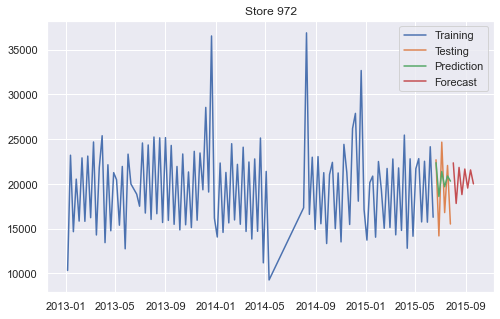

In [1116]:
plt.plot(train,label="Training")
plt.plot(test,label="Testing")
#plt.plot(storeweeklysales, label='full')
#plt.plot(test,label="Test")
plt.plot(predictions, label="Prediction")
plt.plot(Forecast,label="Forecast")
plt.title(f'Store {storeid}')
plt.legend(loc = 'Left corner')
plt.show()

In [656]:
# plt.figure(figsize=(8,5))
# plt.plot(train,label="Training")
# plt.plot(test,label="Test")
# plt.plot(predictions,label="Predicted")
# plt.legend(loc = 'Left corner')
# plt.show()

## 1. AR model

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Define optimal p value for AR model

In [602]:
import itertools

p = range(2,4)
d = 0 # as the data is already stationary, therefore d = 0
q = range(2,4)


pq= list(itertools.product(p,q))
#pdq = [(x[0],x[1], x[2]) for x in pdq]
pdq = [(x[0],d, x[1]) for x in pq]

print('pdq combination: {}'.format(pdq))

pdq combination: [(2, 0, 2), (2, 0, 3), (3, 0, 2), (3, 0, 3)]


In [603]:
warnings.filterwarnings("ignore")

params = []
#param_seasonals = []
aics = []

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,order=param)
            results = mod.fit()
            params.append(param)
            #param_seasonals.append(param_seasonal)
            aics.append(results.aic)
        
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue
dfaic=pd.DataFrame([params,aics],index=['param', 'aic']).T

In [604]:
dfaic.loc[dfaic.aic == dfaic.aic.min()]

,param,aic
1,"(2, 0, 3)",1043.03


p = 2 is the optimal value for AR model 

## Check MAE Result of Time Series Split cross-validation

Please find an image of Time Series Split Cross-Validation
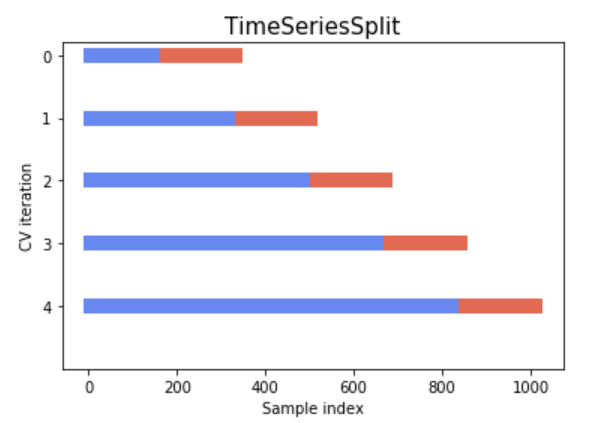

In [411]:
# check the shape of train and test fold in each cross validation
# check mae in each cross validation 

tscv = TimeSeriesSplit(n_splits = 16) 
# create 16 splits, so the test fold will always contain sales of 7 weeks

mae = []
cv_train_shape = []
cv_test_shape = []

for train_index, test_index in tscv.split(storeweeklysales):
    cv_train, cv_test = storeweeklysales.iloc[train_index], storeweeklysales.iloc[test_index]

    ar = SARIMAX(cv_train, order=(3, 0, 3)).fit(disp=False)

    predictions = ar.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    mae.append(mean_absolute_error(true_values, predictions))
    cv_train_shape.append(cv_train.shape)
    cv_test_shape.append(cv_test.shape)

ar_cv_result = pd.DataFrame([cv_train_shape,cv_test_shape, mae], 
                   index=['cv_train_shape', 'cv_test_shape', 'mae']).T

print(ar_cv_result)



   cv_train_shape cv_test_shape      mae
0           (23,)          (7,)  13210.9
1           (30,)          (7,)  11682.2
2           (37,)          (7,)  11823.5
3           (44,)          (7,)  21125.4
4           (51,)          (7,)  22471.6
5           (58,)          (7,)  6435.57
6           (65,)          (7,)  17917.6
7           (72,)          (7,)  11580.1
8           (79,)          (7,)   7571.4
9           (86,)          (7,)    12454
10          (93,)          (7,)  13969.5
11         (100,)          (7,)  18468.7
12         (107,)          (7,)  9404.21
13         (114,)          (7,)  17016.6
14         (121,)          (7,)    14811
15         (128,)          (7,)  11601.7


In [44]:
# create a funct to train AR(2) model with cross validation
def cv_ar(data):
    
    for train_index, test_index in tscv.split(data):
        cv_train, cv_test = data.iloc[train_index], data.iloc[test_index]

        ar = SARIMAX(cv_train, order=(2, 0, 3)).fit(disp=False)

        
    return ar


## AR(2) model result with cross validation 

In [45]:
ar = cv_ar(storeweeklysales)
predictions = ar.predict(test.index.values[0], test.index.values[-1])
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)

print(ar.summary().tables[1])
print('R2 for AR_cv model: {0:.3f}'.format(R2))
print('MAE for AR_cv model: {0:.1f}'.format(mae))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5135      0.310      1.654      0.098      -0.095       1.122
ar.L2          0.4864      0.310      1.567      0.117      -0.122       1.095
ma.L1         -0.5900      0.342     -1.727      0.084      -1.260       0.079
ma.L2         -0.0861      0.383     -0.225      0.822      -0.836       0.664
ma.L3         -0.2183      0.130     -1.678      0.093      -0.473       0.037
sigma2      3.297e+08   5.03e-10   6.55e+17      0.000     3.3e+08     3.3e+08
R2 for AR_cv model: 0.015
MAE for AR_cv model: 9413.9


## AR(2) model result without cross validation

In [605]:
ar = SARIMAX(train, order=(2, 0, 3)).fit(disp=False)
predictions = ar.predict(test.index.values[0], test.index.values[-1])
predictions_ci = ar.get_forecast(steps=7).conf_int()
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)

print(ar.summary().tables[1])
print('R2 for AR model: {0:.3f}'.format(R2))
print('MAE for AR model:{0:.1f}'.format(mae))


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4043      0.593      2.369      0.018       0.243       2.566
ar.L2         -0.4043      0.593     -0.682      0.495      -1.566       0.757
ma.L1         -1.5217      0.663     -2.296      0.022      -2.820      -0.223
ma.L2          0.9087      0.611      1.487      0.137      -0.289       2.106
ma.L3         -0.3686      0.215     -1.713      0.087      -0.790       0.053
sigma2      3.559e+08   3.78e-09   9.41e+16      0.000    3.56e+08    3.56e+08
R2 for AR model: -0.009
MAE for AR model:11670.4


## From above we can see we get the same result with or without cross validation

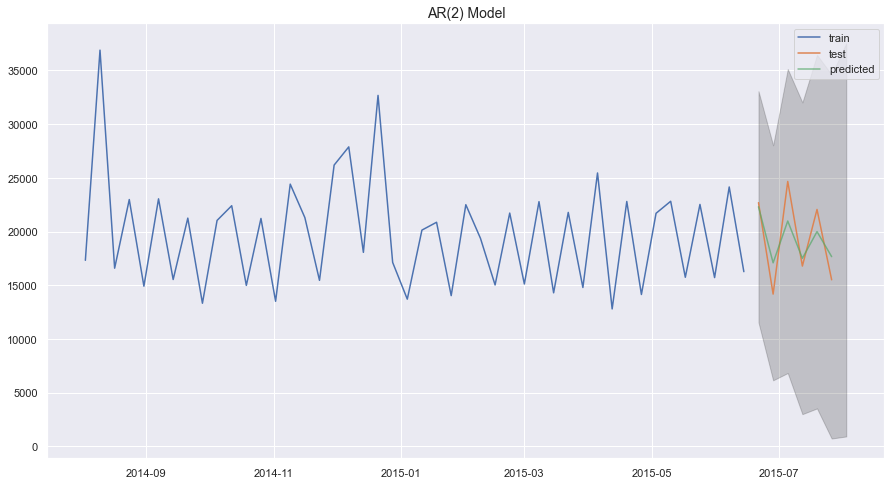

aic is: 932.5897250051727


In [450]:
# plot the result 
plt.figure(figsize=(15,8))
plt.plot(train,label='train')

# predict last 6 month (27 weeks)
plt.plot(test, label='test')
plt.plot(predictions, alpha=0.7, label='predicted')
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:,0], predictions_ci.iloc[:,1]
                ,color='k', alpha=0.2)
#plt.axvline(storeweeklysales.index[24], color='red', ls='--')
plt.title('AR(2) Model', fontsize=14)
plt.legend()
plt.show()

print('aic is: {}'.format(ar.aic))

## 2. SARIMA

### Define optimal p,d,q and P, D, Q, S value for SARIMA model

In [414]:
import itertools
p = range(1,3)
d = q = range(0, 3) 
S = 2 # as we observed a seasonality of 2 weeks
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1],x[2],S) for x in pdq]

print('pdq combination: {}'.format(pdq)) 
print('PDQS combination: {}'.format(seasonal_pdq))

pdq combination: [(1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]
PDQS combination: [(1, 0, 0, 2), (1, 0, 1, 2), (1, 0, 2, 2), (1, 1, 0, 2), (1, 1, 1, 2), (1, 1, 2, 2), (1, 2, 0, 2), (1, 2, 1, 2), (1, 2, 2, 2), (2, 0, 0, 2), (2, 0, 1, 2), (2, 0, 2, 2), (2, 1, 0, 2), (2, 1, 1, 2), (2, 1, 2, 2), (2, 2, 0, 2), (2, 2, 1, 2), (2, 2, 2, 2)]


In [415]:
warnings.filterwarnings("ignore")

params = []
param_seasonals = []
aics = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,order=param,seasonal_order=param_seasonal)
            results = mod.fit()
            params.append(param)
            param_seasonals.append(param_seasonal)
            aics.append(results.aic)
        
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue
dfaic=pd.DataFrame([params, param_seasonals, aics],index=['param', 'param_seasonal', 'aic']).T

In [416]:
dfaic.loc[dfaic.aic == dfaic.aic.min()]

,param,param_seasonal,aic
80,"(1, 1, 2)","(1, 2, 0, 2)",974.783


The optimal value for p,d,q and P,D,Q,S is (1,0,0)and (1,1,1,2)

In [51]:
# check the shape of train and test fold in each cross validation
# check mae in each cross validation 

mae = []
cv_train_shape = []
cv_test_shape = []

for train_index, test_index in tscv.split(storeweeklysales):
    cv_train, cv_test = storeweeklysales.iloc[train_index], storeweeklysales.iloc[test_index]

    sarima = SARIMAX(cv_train, 
                        order=(1, 1, 0),seasonal_order=(1,2,2,2) ).fit(disp=False)

    predictions = sarima.predict(cv_test.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    mae.append(mean_absolute_error(true_values, predictions))
    cv_train_shape.append(cv_train.shape)
    cv_test_shape.append(cv_test.shape)

sarima_cv_result = pd.DataFrame([cv_train_shape,cv_test_shape, mae], 
                   index=['cv_train_shape', 'cv_test_shape', 'mae']).T

print(sarima_cv_result)    

   cv_train_shape cv_test_shape      mae
0           (23,)          (7,)  80683.7
1           (30,)          (7,)  34894.7
2           (37,)          (7,)  14150.3
3           (44,)          (7,)  8063.34
4           (51,)          (7,)  82959.1
5           (58,)          (7,)  5759.45
6           (65,)          (7,)  18235.2
7           (72,)          (7,)  14690.5
8           (79,)          (7,)  17369.2
9           (86,)          (7,)   7036.7
10          (93,)          (7,)  7992.58
11         (100,)          (7,)  40843.4
12         (107,)          (7,)  11788.8
13         (114,)          (7,)  5703.64
14         (121,)          (7,)  26830.8
15         (128,)          (7,)  6646.73


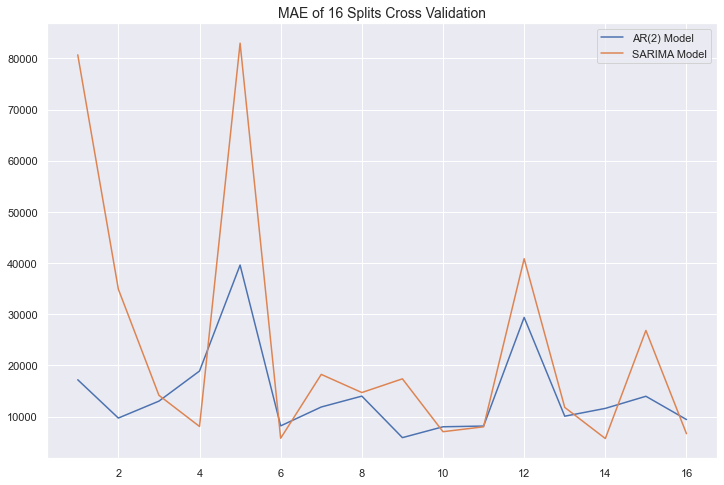

In [52]:
# plot MAE result for each test fold in cross validation for both AR and SARIMA model 
plt.plot(np.arange(1,17), ar_cv_result.mae, label='AR(2) Model')
plt.plot(np.arange(1,17), sarima_cv_result.mae, label='SARIMA Model')

plt.legend()
plt.title('MAE of 16 Splits Cross Validation', fontsize=14)
plt.show()

In [252]:
# create a func to train sarima model with cv 
def cv_sarima(data):
    
    for train_index, test_index in tscv.split(data):
        cv_train, cv_test = data.iloc[train_index], data.iloc[test_index]

        sarima = SARIMAX(cv_train, 
                        order=(1, 1, 0),seasonal_order=(1,2,2,2) ).fit(disp=False)

        
    return sarima

## SARIMA model result with cross validation

In [256]:
# sarima = cv_sarima(storeweeklysales)
# predictions = sarima.predict(test.index.values[0], test.index.values[-1])
# predictions_ci = sarima.get_forecast(steps=7).conf_int()
# true_values = test.values
# mae = mean_absolute_error(true_values, predictions)
# R2 = r2_score(true_values, predictions)

# print(sarima.summary().tables[1])
# print('R2 for SARIMA_cv model: {0:.3f}'.format(R2))
# print('MAE for SARIMA_cv model: {0:.1f}'.format(mae))


## SARIMA model result without cross validation

# best order so far (1, 1, 0), (1,2,2,2)

In [423]:
sarima = SARIMAX(train,order=(1, 1, 2),
                 seasonal_order=(1, 2, 0, 2)).fit(dip=False)

predictions = sarima.predict(test.index.values[0], test.index.values[-1])
predictions_ci = sarima.get_forecast(steps=6).conf_int()
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)

print(sarima.summary().tables[1])
print('R2 for SARIMA model: {0:.3f}'.format(R2))
print('MAE for SARIMA model: {0:.1f}'.format(mae))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2967      0.457     -0.649      0.516      -1.193       0.600
ma.L1         -0.0021      0.977     -0.002      0.998      -1.917       1.913
ma.L2         -0.9084      0.420     -2.165      0.030      -1.731      -0.086
ar.S.L2       -0.6493      0.354     -1.836      0.066      -1.342       0.044
sigma2      1.656e+09   6.62e-10    2.5e+18      0.000    1.66e+09    1.66e+09
R2 for SARIMA model: -10.604
MAE for SARIMA model: 27676.9


## From above we can see we get the same result with or without cross validation

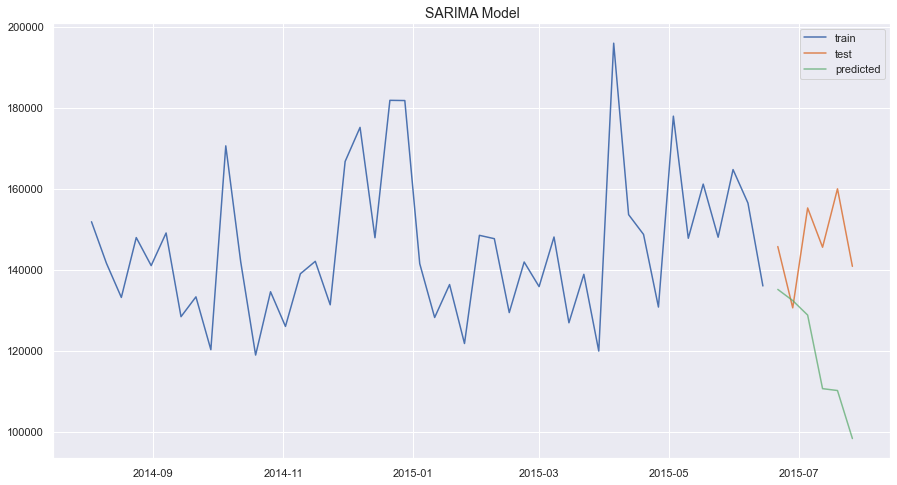

aic is: 974.8


In [418]:
# plot the result
plt.figure(figsize=(15,8))
plt.plot(train,label='train')
# predict last 6 month (27 weeks)
plt.plot(test, label='test')
plt.plot(predictions, alpha=0.7, label='predicted')
#plt.axvline(storeweeklysales.index[24], color='red', ls='--')
# plt.fill_between(predictions_ci.index, predictions_ci.iloc[:,0], predictions_ci.iloc[:,1]
#                 ,color='k', alpha=0.2)
plt.legend()
plt.title('SARIMA Model', fontsize=14)
plt.show()

print('aic is: {0:.1f}'.format(sarima.aic))

## 3. AR model with exogenous variable

In [57]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1016096,2,2,2013-01-01,0,0,0,0,a,1
1016097,3,2,2013-01-01,0,0,0,0,a,1
1016098,4,2,2013-01-01,0,0,0,0,a,1
1016099,5,2,2013-01-01,0,0,0,0,a,1


In [429]:
# add the week number as exogenous variable
Nthweekofyear = [x.isocalendar()[1] for x in storeweeklysales.index]
exog_train = Nthweekofyear[:128]
exog_test= Nthweekofyear[128:]

In [426]:
import itertools
p = range(1,3)
d = 0
q = 0


p = list(itertools.product(p))
#pdq = [(x[0],x[1], x[2]) for x in pdq]
pdq = [(x[0],d, q) for x in p]

print('pdq combination: {}'.format(pdq))


pdq combination: [(1, 0, 0), (2, 0, 0)]


In [430]:
warnings.filterwarnings("ignore")

params = []
#param_seasonals = []
aics = []

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,order=param,exog = exog_train)
            results = mod.fit()
            params.append(param)
            #param_seasonals.append(param_seasonal)
            aics.append(results.aic)
        
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue
dfaic=pd.DataFrame([params,aics],index=['param', 'aic']).T

In [431]:
dfaic.loc[dfaic.aic == dfaic.aic.min()]

,param,aic
1,"(2, 0, 0)",1056.92


p = 2 is the optimal value for AR_exog model

In [62]:
# pd.set_option('display.max_rows', None)  
# pd.DataFrame([exog_train, train.index]).T

In [432]:
ar_exog = SARIMAX(train, order=(2, 0, 0), exog=exog_train).fit(disp=False)
predictions = ar_exog.predict(test.index.values[0], test.index.values[-1], exog=exog_test)
#predictions_ci = arima.get_forecast(steps=27).conf_int()
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)


print(ar_exog.summary().tables[1])
print('R2 for AR model with exog variable: {0:.3f}'.format(R2))
print('MAE for AR model with exog variable: {0:.1f}'.format(mae))

ValueError: Provided exogenous values are not of the appropriate shape. Required (6, 1), got (88,).

## We can see from above, after adding expgenous varible, AR(2) model's performance siginificantly decreased (R2 decreased and MAE increased)

## 4. SARIMA model with exogenous variable

In [258]:
import itertools
p = range(1,3)
d = q = range(0, 3)
S = 2
pdq = list(itertools.product(p,d, q))
#pdq = [(x[0],x[1], x[2]) for x in pdq]
seasonal_pdq = [(x[0], x[1],x[2],S) for x in pdq]

print('pdq combination: {}'.format(pdq))
print('PDQS combination: {}'.format(seasonal_pdq))

pdq combination: [(1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]
PDQS combination: [(1, 0, 0, 2), (1, 0, 1, 2), (1, 0, 2, 2), (1, 1, 0, 2), (1, 1, 1, 2), (1, 1, 2, 2), (1, 2, 0, 2), (1, 2, 1, 2), (1, 2, 2, 2), (2, 0, 0, 2), (2, 0, 1, 2), (2, 0, 2, 2), (2, 1, 0, 2), (2, 1, 1, 2), (2, 1, 2, 2), (2, 2, 0, 2), (2, 2, 1, 2), (2, 2, 2, 2)]


In [259]:
warnings.filterwarnings("ignore")

params = []
param_seasonals = []
aics = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,order=param,seasonal_order=param_seasonal, exog = exog_train)
            results = mod.fit()
            params.append(param)
            param_seasonals.append(param_seasonal)
            aics.append(results.aic)
        
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue
dfaic=pd.DataFrame([params, param_seasonals, aics],index=['param', 'param_seasonal', 'aic']).T

In [260]:
dfaic.loc[dfaic.aic == dfaic.aic.min()]

,param,param_seasonal,aic
37,"(1, 0, 2)","(1, 1, 0, 2)",2853.37


The optimal value for p,d,q and P,D,Q,S is (1,0,0)and (2,1,1,2)

In [261]:
sarima_exog = SARIMAX(train,order=(1, 0, 2),
                 seasonal_order=(1, 1, 0, 2), exog = exog_train).fit(dip=False)

predictions = sarima_exog.predict(test.index.values[0], test.index.values[-1], exog = exog_test)
predictions_ci = sarima_exog.get_forecast(steps=7, exog = exog_test).conf_int()
true_values = test.values
mae = mean_absolute_error(true_values, predictions)
R2 = r2_score(true_values, predictions)


print(sarima_exog.summary().tables[1])
print('R2 for SARIMA model with exog varible: {0:.3f}'.format(R2))
print('MAE for SARIMA model with exog varible: {:.1f}'.format(mae))

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           431.5560    104.691      4.122      0.000     226.365     636.747
ar.L1          0.0126      0.108      0.116      0.907      -0.199       0.224
ma.L1          0.2029      0.169      1.202      0.230      -0.128       0.534
ma.L2         -0.7969      0.096     -8.322      0.000      -0.985      -0.609
ar.S.L2        0.4418      0.074      5.944      0.000       0.296       0.587
sigma2       3.39e+08   1.11e-07   3.06e+15      0.000    3.39e+08    3.39e+08
R2 for SARIMA model with exog varible: 0.383
MAE for SARIMA model with exog varible: 8356.9


## We can see for SARIMA model, after adding exog variable, the performace increased (R2 increased and MAE decreased)

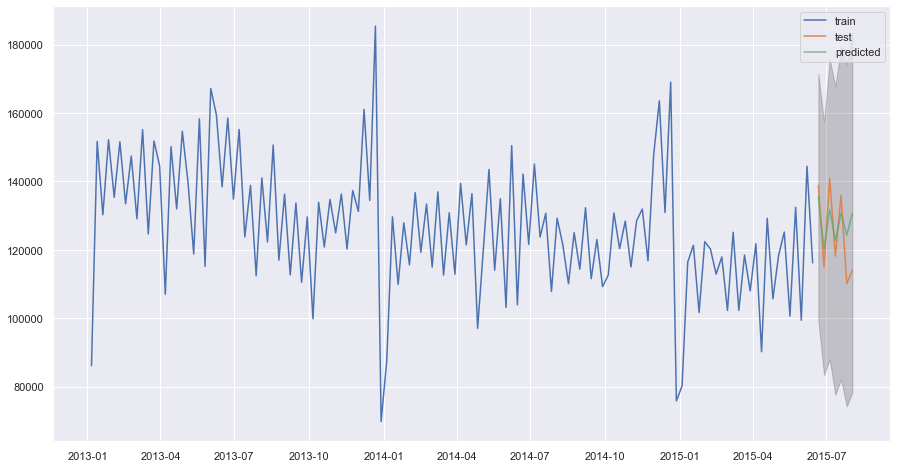

aic is: 2853.4


In [262]:
# plot the result
plt.figure(figsize=(15,8))
plt.plot(train,label='train')
# predict last 6 month (27 weeks)
plt.plot(test, label='test')
plt.plot(predictions, alpha=0.7, label='predicted')
#plt.axvline(storeweeklysales.index[24], color='red', ls='--')
plt.fill_between(predictions_ci.index, predictions_ci.iloc[:,0], predictions_ci.iloc[:,1]
                ,color='k', alpha=0.2)
plt.legend()
plt.show()

print('aic is: {0:.1f}'.format(sarima_exog.aic))

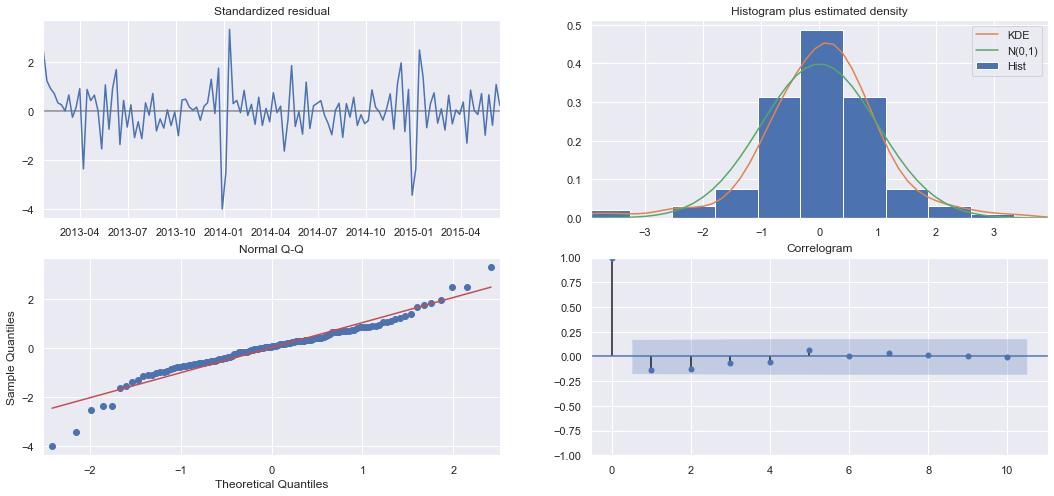

In [69]:
sarima_exog.plot_diagnostics(figsize=(18, 8))
plt.show()

In [70]:
# weekly_sales_opendays_cus.Customers.plot()
# plt.show()

# weekly_sales_opendays_cus.Open.plot()
# plt.show()

In [119]:
url = 'https://raw.githubusercontent.com/SushmithaPulagam/TimeSeries_Auto-ARIMA/master/Champagne%20Sales.csv'

In [120]:
sales_data = pd.read_csv(url)

In [121]:
sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [122]:
sales_data.set_index('Month',inplace=True)

In [127]:
sales_data.head()

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [123]:
train = sales_data[:85]
test = sales_data[-20:]

In [129]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1205.819, BIC=1210.373, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1194.062, BIC=1203.169, Fit time=0.087 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1174.301, BIC=1183.408, Fit time=0.267 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1178.204, BIC=1189.587, Fit time=0.510 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1172.837, BIC=1179.667, Fit time=0.058 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1173.095, BIC=1182.202, Fit time=0.237 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1172.790, BIC=1181.897, Fit time=0.114 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 1, 0, 12); AIC=1174.149, BIC=1187.809, Fit time=0.264 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=1172.026, BIC=1183.409, Fit time=0.370 seconds
Fit ARIMA: order=(0, 1, 2) s

In [130]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   85
Model:             SARIMAX(0, 1, 2)x(2, 1, [], 12)   Log Likelihood                -579.748
Date:                             Tue, 12 Jan 2021   AIC                           1171.497
Time:                                     22:40:24   BIC                           1185.157
Sample:                                          0   HQIC                          1176.935
                                              - 85                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -12.8553      4.374     -2.939      0.003     -21.428      -4.283
ma.L1         -0.7547      0.164     -4.607      0.000      -1.076      -0.434
ma.L2         -0.2453      0.095     -2.577      0.010      -0.432      -0.059
ar.S.L12      -0.1640      0.107     -1.529      0.126      -0.374       0.046
ar.S.L24       0.1900      0.093      2.045      0.041       0.008       0.372
sigma2      5.121e+05   3.28e-07   1.56e+12      0.000    5.12e+05    5.12e+05
===================================================================================
Ljung-Box (Q):                       40.23   Jarque-Bera (JB):                 5.53
Prob(Q):                              0.46   Prob(JB):                         0.06
Heteroskedasticity (H):               1.79   Skew:                             0.20
Prob(H) (two-sided):                  0.16   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.94e+30. Standard errors may be unstable.
"""

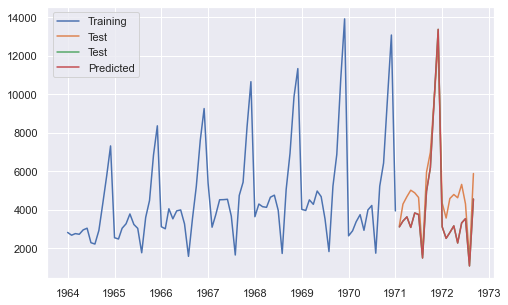

0.7478247947829015

In [132]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction


# In[21]:


plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()


# In[22]:


from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])